<a href="https://colab.research.google.com/github/2203A51455N/DATA/blob/main/examm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating dataset


In [3]:
import numpy as np
import pandas as pd

np.random.seed(42)

# Generate synthetic dataset
n = 100
region_ids = [f"R{str(i).zfill(3)}" for i in range(1, n+1)]
crop_types = ['Wheat', 'Rice', 'Maize', 'Soybean', 'Cotton']

crop_assign = np.random.choice(crop_types, size=n, p=[0.25,0.25,0.2,0.2,0.1])

start = pd.to_datetime('2018-01-01')
end = pd.to_datetime('2024-12-31')
date_range = pd.date_range(start, end, freq='MS')
harvest_dates = np.random.choice(date_range, size=n)

base_rain_by_crop = {'Wheat': 200, 'Rice': 350, 'Maize': 250, 'Soybean': 220, 'Cotton': 180}
rainfall = np.array([np.random.normal(loc=base_rain_by_crop[c], scale=80) for c in crop_assign])
rainfall = np.clip(rainfall, 20, 800)

temp = 30 - 0.008*rainfall + np.random.normal(0, 2, size=n)
temp = np.round(temp, 1)

base_yield_by_crop = {'Wheat': 1800, 'Rice': 2600, 'Maize': 2400, 'Soybean': 1500, 'Cotton': 1200}
yields = []
for i, c in enumerate(crop_assign):
    r = rainfall[i]
    base = base_yield_by_crop[c]
    rain_effect = -0.002*(r-350)**2 + 500
    yield_val = base + rain_effect + np.random.normal(0, 250)
    yields.append(max(200, yield_val))
yields = np.round(yields, 0)

df = pd.DataFrame({
    'region_id': region_ids,
    'crop_type': crop_assign,
    'yield_kg_per_acre': yields.astype(int),
    'rainfall_mm': rainfall.round(1),
    'temp_c': temp,
    'harvest_date': harvest_dates
})
df = df.sort_values('yield_kg_per_acre', ascending=False).reset_index(drop=True)

csv_path = 'crop_yield_dataset.csv'
df.to_csv(csv_path, index=False)
print("Saved dataset to", csv_path)


Saved dataset to crop_yield_dataset.csv


Scatter Plot: Rainfall vs Yield

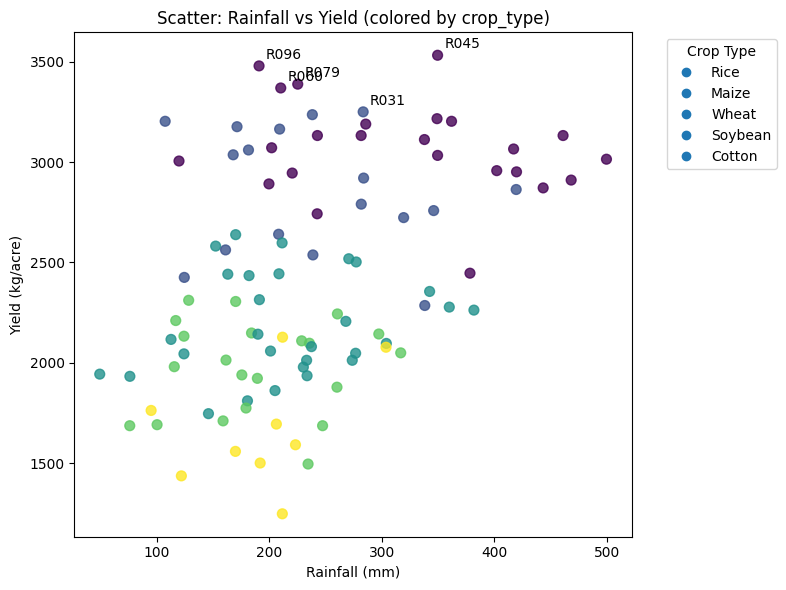

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('crop_yield_dataset.csv')

labels, uniques = pd.factorize(df['crop_type'])
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(df['rainfall_mm'], df['yield_kg_per_acre'], c=labels, s=50, alpha=0.8)
ax.set_xlabel('Rainfall (mm)')
ax.set_ylabel('Yield (kg/acre)')
ax.set_title('Scatter: Rainfall vs Yield (colored by crop_type)')

# legend
handles = [plt.Line2D([0],[0], marker='o', linestyle='', markersize=6, label=u) for u in uniques]
ax.legend(handles=handles, title='Crop Type', bbox_to_anchor=(1.05,1))

# annotate top 5
top5 = df.head(5)
for _, row in top5.iterrows():
    ax.annotate(row['region_id'], (row['rainfall_mm'], row['yield_kg_per_acre']), textcoords="offset points", xytext=(5,5))

plt.tight_layout()
plt.show()


Histogram of Temperature

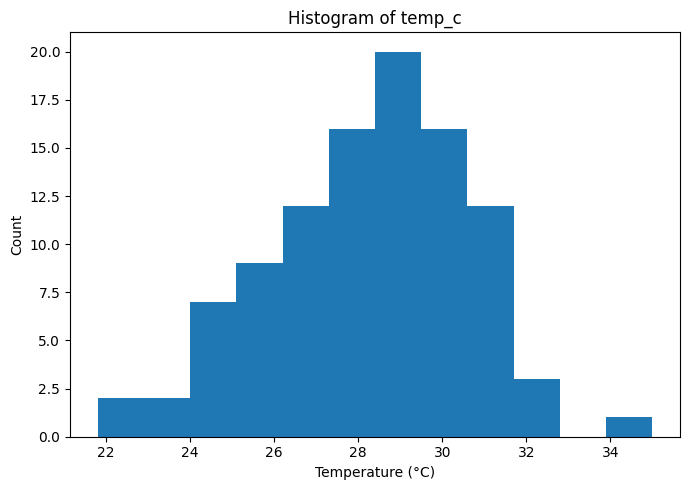

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('crop_yield_dataset.csv')

fig, ax = plt.subplots(figsize=(7,5))
ax.hist(df['temp_c'], bins=12)
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Count')
ax.set_title('Histogram of temp_c')
plt.tight_layout()
plt.show()


Boxplot Yield by Crop Type

/tmp/ipython-input-3126340832.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(groups, labels=crop_types)


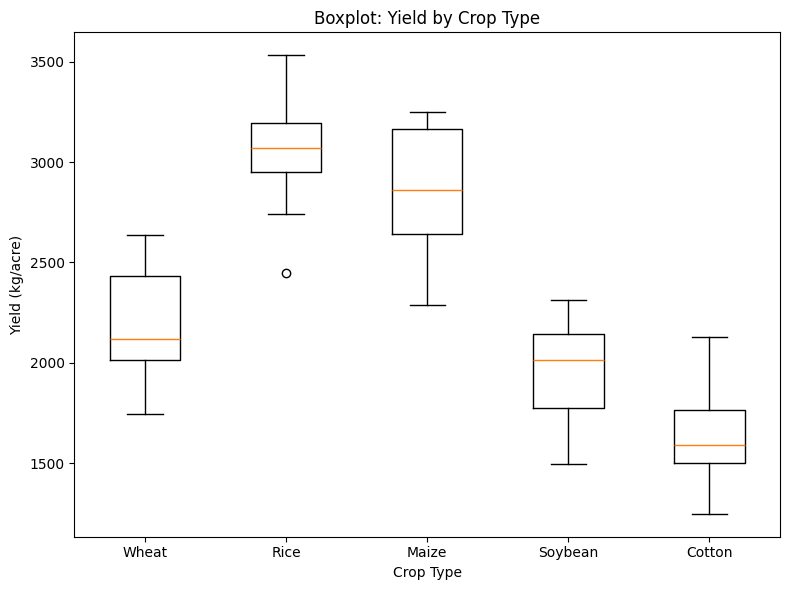

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('crop_yield_dataset.csv')

crop_types = ['Wheat', 'Rice', 'Maize', 'Soybean', 'Cotton']
groups = [df[df['crop_type']==c]['yield_kg_per_acre'] for c in crop_types]

fig, ax = plt.subplots(figsize=(8,6))
ax.boxplot(groups, labels=crop_types)
ax.set_xlabel('Crop Type')
ax.set_ylabel('Yield (kg/acre)')
ax.set_title('Boxplot: Yield by Crop Type')
plt.tight_layout()
plt.show()


Monthly Average Yield

/tmp/ipython-input-2987844383.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df_ts['yield_kg_per_acre'].resample('M').mean().fillna(method='ffill')
/tmp/ipython-input-2987844383.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_avg = df_ts['yield_kg_per_acre'].resample('M').mean().fillna(method='ffill')


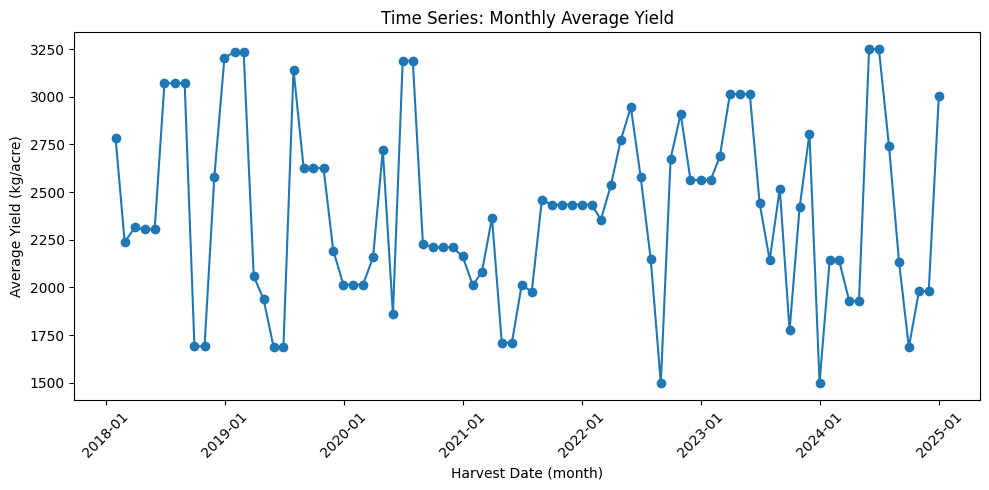

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter

df = pd.read_csv('crop_yield_dataset.csv', parse_dates=['harvest_date'])
df_ts = df.set_index('harvest_date').sort_index()
monthly_avg = df_ts['yield_kg_per_acre'].resample('M').mean().fillna(method='ffill')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(monthly_avg.index, monthly_avg.values, marker='o')
ax.set_xlabel('Harvest Date (month)')
ax.set_ylabel('Average Yield (kg/acre)')
ax.set_title('Time Series: Monthly Average Yield')
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Probability Calculations

In [8]:
import pandas as pd

df = pd.read_csv('crop_yield_dataset.csv')

cond_A = (df['yield_kg_per_acre'] > 2500) | (df['rainfall_mm'] > 300)
p_A = cond_A.mean()
cond_B = (df['yield_kg_per_acre'] > 2500) & (df['rainfall_mm'] > 200)
p_B = cond_B.mean()

print(f"P(yield > 2500 OR rainfall > 300) = {p_A:.3f}")
print(f"P(yield > 2500 AND rainfall > 200) = {p_B:.3f}")


P(yield > 2500 OR rainfall > 300) = 0.510
P(yield > 2500 AND rainfall > 200) = 0.330


Combinatorics

In [ ]:
import pandas as pd
import math

df = pd.read_csv('crop_yield_dataset.csv')
total_regions = len(df)
ways_choose_3 = math.comb(total_regions, 3)
k_crops = df['crop_type'].nunique()
ways_rank_top3_crops = math.perm(k_crops, 3)

print("C(100,3) =", ways_choose_3)
print("P(5,3) =", ways_rank_top3_crops)


Combinatorics

In [9]:
import pandas as pd
import math

df = pd.read_csv('crop_yield_dataset.csv')
total_regions = len(df)
ways_choose_3 = math.comb(total_regions, 3)
k_crops = df['crop_type'].nunique()
ways_rank_top3_crops = math.perm(k_crops, 3)

print("C(100,3) =", ways_choose_3)
print("P(5,3) =", ways_rank_top3_crops)


C(100,3) = 161700
P(5,3) = 60


Central Limit Theorem (CLT) Simulation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('crop_yield_dataset.csv')

sample_size = 30
repeats = 1000
population = df['yield_kg_per_acre'].values
sample_means = [np.mean(np.random.choice(population, size=sample_size, replace=True)) for _ in range(repeats)]

fig, ax = plt.subplots(figsize=(8,5))
ax.hist(sample_means, bins=25)
ax.set_xlabel('Sample mean of yield (kg/acre)')
ax.set_ylabel('Frequency')
ax.set_title(f'Distribution of sample means (n={sample_size}, repeats={repeats})')
plt.tight_layout()
plt.show()
